In [1]:
# !unzip ./data.zip

In [1]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session =tf.compat.v1.InteractiveSession(config=config)
gpu = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

In [2]:
!nvidia-smi

Mon Apr  5 19:38:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.39       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Graphics Device     Off  | 00000000:26:00.0  On |                  N/A |
| 60%   50C    P2    31W / 170W |    552MiB / 12045MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Become one with the data

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

In [4]:
paths_walkthrough = ['Dataset']
for path_walkthrough in paths_walkthrough:
  print('\n'*5)
  print('*-*'*50)
  print(path_walkthrough)
  print('*-*'*50)
  print('\n'*5)
  for (root,dirs,files) in os.walk(path_walkthrough): 
    print('-'*50)
    print(f'Root : {root}')
    print(f'Dirs : {dirs}')
    print(f'No of Imgs : {len(files)}')
    print('-'*50)







*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Dataset
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*






--------------------------------------------------
Root : Dataset
Dirs : ['Validation', 'Test', 'Train']
No of Imgs : 0
--------------------------------------------------
--------------------------------------------------
Root : Dataset/Validation
Dirs : ['Male', 'Female']
No of Imgs : 0
--------------------------------------------------
--------------------------------------------------
Root : Dataset/Validation/Male
Dirs : []
No of Imgs : 8820
--------------------------------------------------
--------------------------------------------------
Root : Dataset/Validation/Female
Dirs : []
No of Imgs : 13778
--------------------------------------------------
-------------

Train
Female
014988.jpg


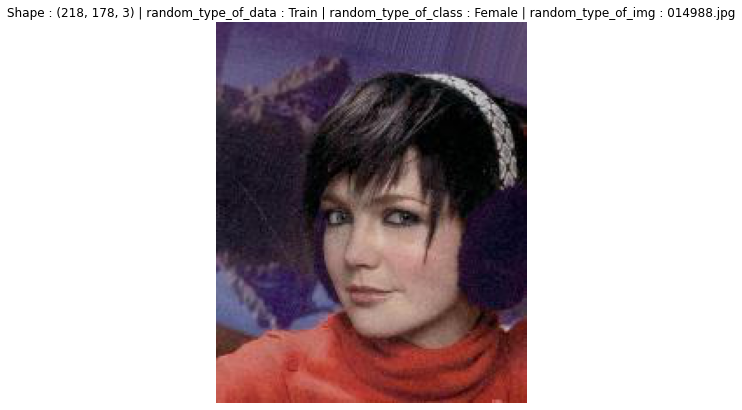

In [5]:
how_many_imgs = 1
for _ in range(how_many_imgs):
  random_type_of_data = random.choice(['Train','Test','Validation'])
  print(random_type_of_data)
  random_type_of_class = random.choice(os.listdir('./Dataset/Train'))
  print(random_type_of_class)
  random_type_of_img = random.choice(os.listdir(f'./Dataset/{random_type_of_data}/{random_type_of_class}'))
  print(random_type_of_img)
  path = f"./Dataset/{random_type_of_data}/{random_type_of_class}/{random_type_of_img}"
  img = mpimg.imread(path)
  img = img / 255.0
  plt.figure(figsize=(10,7))
  plt.imshow(img)
  plt.title(f'Shape : {img.shape} | random_type_of_data : {random_type_of_data} | random_type_of_class : {random_type_of_class} | random_type_of_img : {random_type_of_img}')
  plt.axis(False)
  plt.show();

# Loading the Data

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.25,height_shift_range=0.25,shear_range=0.25,zoom_range=0.25,horizontal_flip=True,vertical_flip=True,validation_split=0.993)
valid_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)
train_data = train_datagen.flow_from_directory('./Dataset/Train/',target_size=(224,224),class_mode="binary")
train_data_small = train_datagen.flow_from_directory('./Dataset/Train/',target_size=(224,224),subset='training',class_mode="binary")
valid_data = valid_datagen.flow_from_directory('./Dataset/Validation',target_size=(224,224),class_mode="binary")

Found 160000 images belonging to 2 classes.
Found 1121 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


# Modelling

In [8]:
PROJECT_NAME = "Gender-Classification"

In [9]:
!pip3 install wandb
import wandb
from wandb.keras import *
import tensorflow_hub as hub
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [10]:
len(os.listdir('./Dataset/Train/'))

2

## CNN (Custom) vs Transfer Learning (resnet50) vs Classification

### Classificiation

In [11]:
# print('Initing wandb...')
# wandb.init(project=PROJECT_NAME,name='classification-baseline')
# print('Making the model...')
# model = tf.keras.Sequential([
#   tf.keras.layers.Flatten(input_shape=(224,224,3)),
#   tf.keras.layers.Dense(5,activation='relu'),
#   tf.keras.layers.Dense(5,activation='relu'),
#   tf.keras.layers.Dense(len(os.listdir('./Dataset/Train/')),activation='sigmoid')
# ])
# print('Compileing the model...')
# model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# print('fitting the model...')
# model.fit(train_data_small,validation_data=(valid_data),epochs=25,callbacks=[WandbCallback()])
# print('Done fitting the model...')
# wandb.finish()
# print('Finished the wandb...')

### CNN (Custom)

In [12]:
# print('Initing wandb...')
# wandb.init(project=PROJECT_NAME,name='cnn--custom--baseline')
# print('Making the model...')
# model = tf.keras.Sequential([
#   tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(len(os.listdir('./Dataset/Train/')),activation='sigmoid')
# ])
# print('Compileing the model...')
# model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# print('fitting the model...')
# model.fit(train_data_small,validation_data=(valid_data),epochs=25,callbacks=[WandbCallback()])
# print('Done fitting the model...')
# wandb.finish()
# print('Finished the wandb...')

### Transfer Learning (resnet50)

In [13]:
models_to_try = [
    # ['efficentnetb2','https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1'],
    # ['efficentnetb7','https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1'],
    # ['efficentnetb5','https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1'],
    # ['efficentnetb4','https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1'],
    # ['efficentnetb3','https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1'],
    # ['efficentnetb1','https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1'],
    # ['efficentnetb6','https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1'],
    # ['resnet50','https://tfhub.dev/tensorflow/resnet_50/feature_vector/1'],
    ['resnet_v2_152','https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4'],
    # ['resnet_v1_152','https://tfhub.dev/google/imagenet/resnet_v1_152/feature_vector/4'],
    ['resnet_v1_50','https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/4'],
    ['resnet_v1_101','https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/4'],
    # ['inception_resnet_v2','https://tfhub.dev/google/imagenet/inception_resnet_v2/feature_vector/4'],
    # ['inception_v1','https://tfhub.dev/google/imagenet/inception_v1/feature_vector/4'],
    ['inception_v3','https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4'],
    # ['nasnet_large','https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4'],
    # ['nasnet_mobile','https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4'],
    # ['mobilenet_v2','https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'],
    ['mobilenet_v3_large_100_224','https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5'],
    # ['mobilenet_v2_100_224','https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4'],
    # ['mobilenet_v2_140_224','https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4'],
    # ['mobilenet_v1_100_224','https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/feature_vector/4'],
    ['mobilenet_v3_small_100_224','https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5'],
    # ['efficentnetb0','https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'],
]

In [14]:
# model_url = "https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"
# print('Initing wandb...')
# wandb.init(project=PROJECT_NAME,name='transfer-learning--resnet50--baseline')
# print('Making the model...')
# model = tf.keras.Sequential([
#   hub.KerasLayer(model_url,input_shape=(224,224,3),trainable=False),
#   tf.keras.layers.Dense(len(os.listdir('./Dataset/Train/')),activation='sigmoid')
# ])
# print('Compileing the model...')
# model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# print('fitting the model...')
# model.fit(train_data_small,validation_data=(valid_data),epochs=25,callbacks=[WandbCallback()])
# print('Done fitting the model...')
# wandb.finish()
# print('Finished the wandb...')

Classifiication vs CNN vs Transfer Learning Which is the best ? 

<hr>

**Transfer Learning** Won !!

In [15]:
# for model_to_try in models_to_try:
#   try:
#     print('-'*100)
#     print(model_to_try)
#     print('-'*100)
#     wandb.init(project=PROJECT_NAME,name=f"{model_to_try[0]}-tl")
#     model = tf.keras.Sequential([
#       hub.KerasLayer(model_to_try[1],input_shape=(224,224,3),trainable=False),
#       tf.keras.layers.Dense(len(os.listdir('./Dataset/Train/')),activation='sigmoid')
#     ])
#     model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
#     model.fit(train_data_small,validation_data=(valid_data),epochs=5,callbacks=[WandbCallback(save_model=False)])
#   except:
#     print('-'*100)
#     print('Didnt work')
#     print(model_to_try)
#     print('Didnt work')
#     print('-'*100)

#### Best `Accuracy` = efficentnetb7
#### Best `Val Accuracy` = efficentnetb4
#### Best `Loss` = efficentnetb4
#### Best `Val Loss` = efficentnetb4

### **`...` won !! it is the best transfer learning model for this project so I am going to use `...` lets train the `...` model on the whole dataset (160000) images now I am just training is like 1250 or something small like that**

In [16]:
# import os

# pid = os.getpid()
# !kill -9 $pid

In [31]:
model_url = "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1"
print('Initing wandb...')
wandb.init(project=PROJECT_NAME,name='big-dog-model-1')
print('Making the model...')
model = tf.keras.Sequential([
  hub.KerasLayer(model_url,input_shape=(224,224,3),trainable=False),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
print('Compileing the model...')
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
print('fitting the model...')
model.fit(train_data,validation_data=(valid_data),epochs=7,callbacks=[WandbCallback(),tf.keras.callbacks.EarlyStopping(patience=round(2.5))])
print('Done fitting the model...')
wandb.finish()
print('Finished the wandb...')
print('Saving the model...')
model.save('./model-1.h5')
print('Done saving the model...')
print('Finished big dog model 0')

Initing wandb...


epoch,3
loss,0.17527
accuracy,0.9296
val_loss,0.14196
val_accuracy,0.94433
_runtime,4865
_timestamp,1617636867
_step,3
best_val_loss,0.14196
best_epoch,3


epoch,▁▃▆█
loss,█▃▂▁
accuracy,▁▆██
val_loss,█▁▃▁
val_accuracy,▁█▆▇
_runtime,▁▃▆█
_timestamp,▁▃▆█
_step,▁▃▆█


Making the model...
Compileing the model...
fitting the model...
Epoch 1/2
5000/5000 [==============================] - 1277s 254ms/step - loss: 0.2274 - accuracy: 0.9072 - val_loss: 0.1480 - val_accuracy: 0.9418
Epoch 2/2
5000/5000 [==============================] - 1244s 249ms/step - loss: 0.1853 - accuracy: 0.9249 - val_loss: 0.1413 - val_accuracy: 0.9453
Done fitting the model...


epoch,1
loss,0.18248
accuracy,0.9262
val_loss,0.14128
val_accuracy,0.94535
_runtime,2540
_timestamp,1617640488
_step,1
best_val_loss,0.14128
best_epoch,1


epoch,▁█
loss,█▁
accuracy,▁█
val_loss,█▁
val_accuracy,▁█
_runtime,▁█
_timestamp,▁█
_step,▁█


Finished the wandb...
Saving the model...
Done saving the model...
Finished big dog model 0


In [32]:
model = tf.keras.models.load_model('./model-0.h5',custom_objects={'KerasLayer':hub.KerasLayer})

In [35]:
test_data = test_datagen.flow_from_directory('./Dataset/Test',target_size=(224,224),class_mode='binary')
model.evaluate(test_data)

Found 20001 images belonging to 2 classes.
626/626 [==============================] - 183s 289ms/step - loss: 0.1314 - accuracy: 0.9497


[0.1313631236553192, 0.9497025012969971]

In [36]:
# model.evaluate(valid_data)

In [37]:
# !pip install 'h5py < 3.0.0'

In [38]:
# model.evaluate(train_data)

In [39]:
preds = model.predict(valid_data)

In [41]:
for pred in preds:
  print(pred)
  break

[0.9998784]


# Testing with real world data

In [66]:
imgs = os.listdir('./Test')

In [67]:
imgs

['WhatsApp Image 2021-04-05 at 19.46.02.jpeg',
 'WhatsApp Image 2021-04-05 at 22.20.27.jpeg',
 'WhatsApp Image 2021-04-05 at 22.20.28 (1).jpeg',
 'WhatsApp Image 2021-04-05 at 19.46.03.jpeg',
 'WhatsApp Image 2021-04-05 at 19.46.01 (1).jpeg',
 'WhatsApp Image 2021-04-05 at 19.46.01.jpeg',
 'WhatsApp Image 2021-04-05 at 19.46.02 (1).jpeg',
 'WhatsApp Image 2021-04-05 at 22.20.29.jpeg',
 'WhatsApp Image 2021-04-05 at 22.20.28.jpeg',
 'WhatsApp Image 2021-04-05 at 19.46.02 (2).jpeg']

In [74]:
!pip3 install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [70]:
from keras_preprocessing import image
import numpy as np

In [ ]:
for img in imgs:
  img_see = mpimg.imread(f'./Test/{img}')
  img = image.load_img(f'./Test/{img}',target_size=(224,224))
  img = image.img_to_array(img)
  pred = model.predict(np.expand_dims(img,axis=0))
  class_names = ['Male','Female']
  pred = class_names[int(tf.squeeze(tf.round(tf.squeeze(pred))))]
  plt.figure(figsize=(10,7))
  plt.imshow(img_see)
  plt.title(f'Pred : {pred}')
  plt.axis(False)
  plt.show();